# TEST

Dummy notebook to test functions

In [1]:
import nbimporter
import prepData as prep
import fitFunc as fits
import Statistics as stat

import matplotlib.pyplot as plt
import numpy as np 

## Test prepData

Import data from example run and prepare it for further analysis.

In [2]:
data,center,length = prep.load_dataset(395)
freq, fft, weights, ref, N = prep.prep_data(data,center, length=length)

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


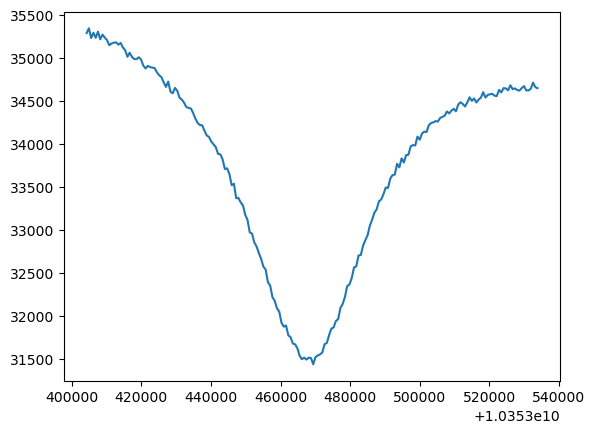

In [3]:
plt.plot(freq, fft)

## Test Fits

### Background Fit

First fit background and check the distribution of residuals.

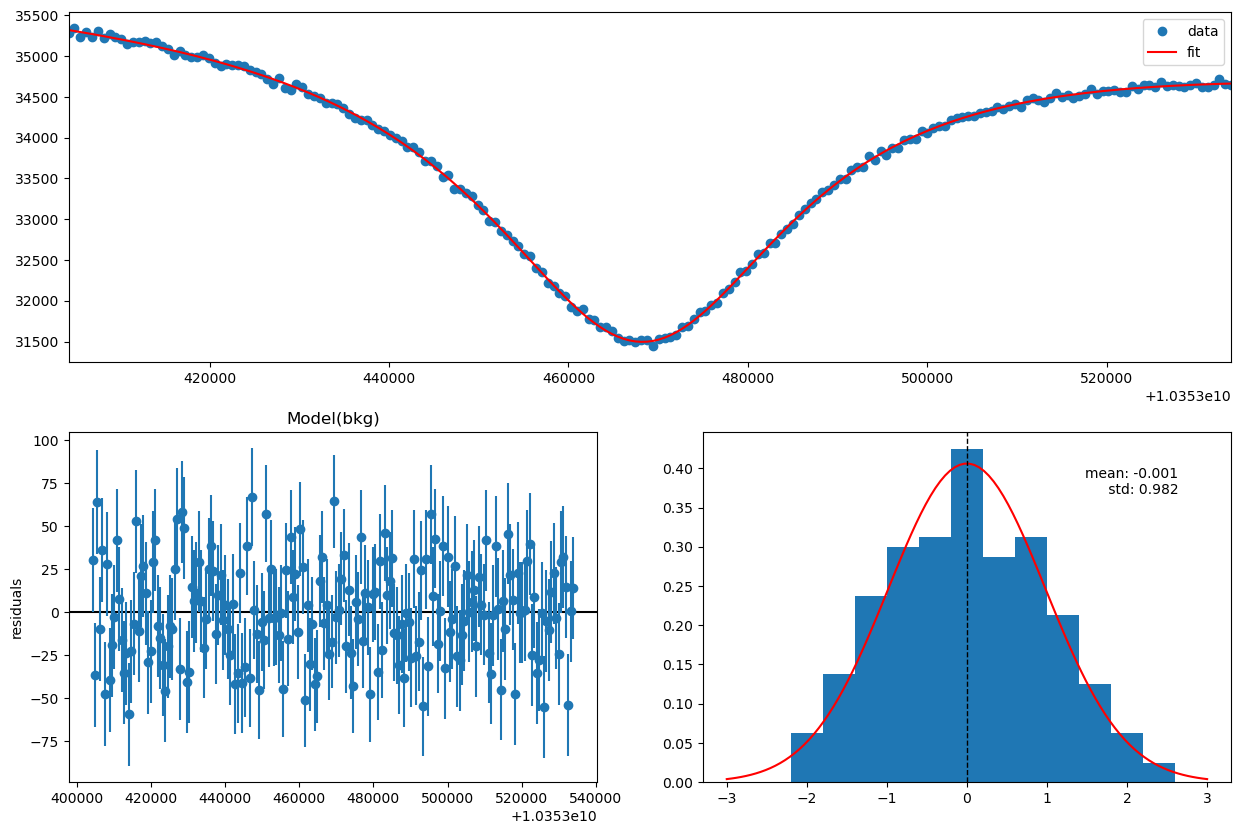

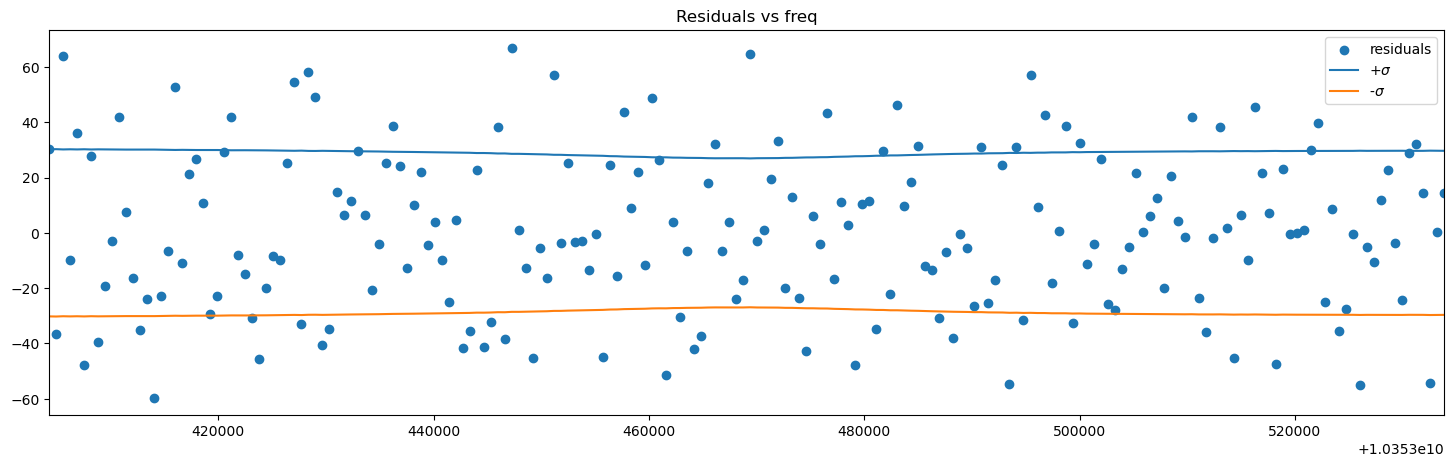

In [4]:
res_bkg = fits.fit_bkg(freq, fft, weights, center, ref)
fits.plot_fit(freq, fft, weights, res_bkg)

### Signal FIt

Fit signal function using every possible frequency as the centre of the signal and check the values of $\mu$ obtained. 

In [5]:
bkg_params = res_bkg.best_values

mu_fit = np.empty(len(freq))
for i in range(len(freq)):
    res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=freq[i],
                           init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
    mu_fit[i] = res_sig.best_values["mu"]

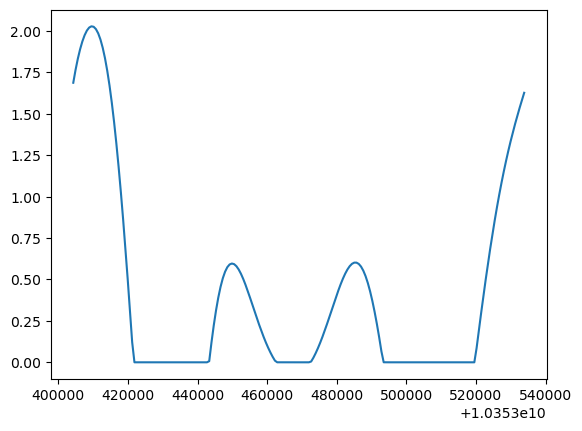

In [6]:
plt.plot(freq, mu_fit)

Check fit results fror maximum $\mu$ obtained.

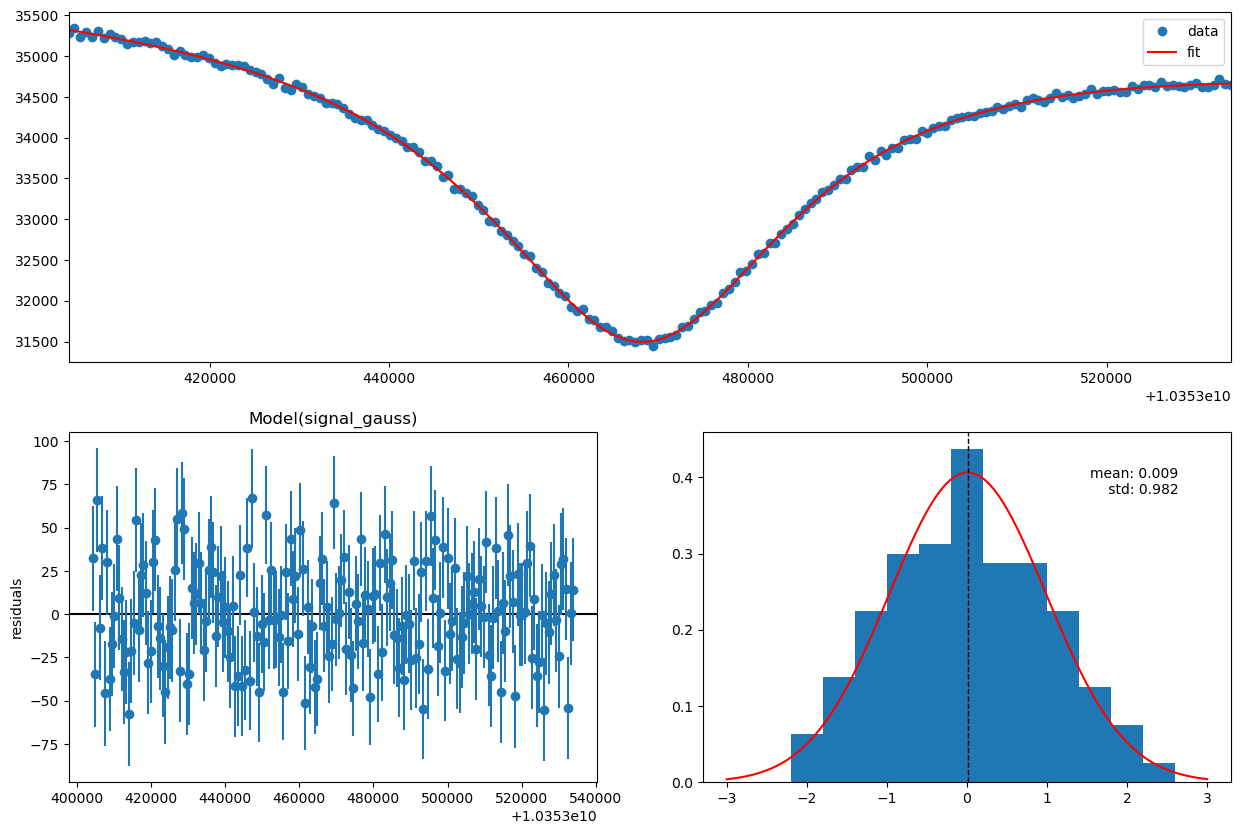

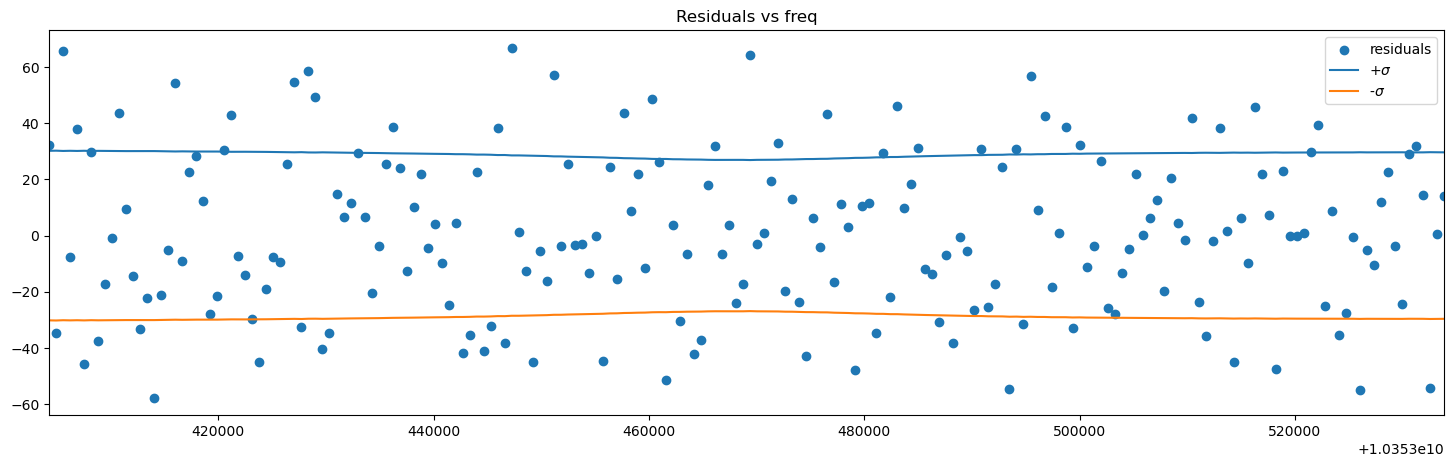

In [7]:
x0_max = freq[np.argmax(mu_fit)]

res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
fits.plot_fit(freq, fft, weights, res_sig)

## Test Statistics

Compute likelihood ratio over observed data.

In [8]:
q0_obs = stat.lh_ratio(fft, res_bkg.best_fit, res_sig.best_fit)
q0_obs

0.1079270244745203

### Significance

Compute significance as a function of the center of the signal.

In [9]:
z = stat.stat_test(run=395, signal=fits.signal_gauss, x_0=freq, path='db/', n_toy=300, calc_z=True, calc_CI=False)

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


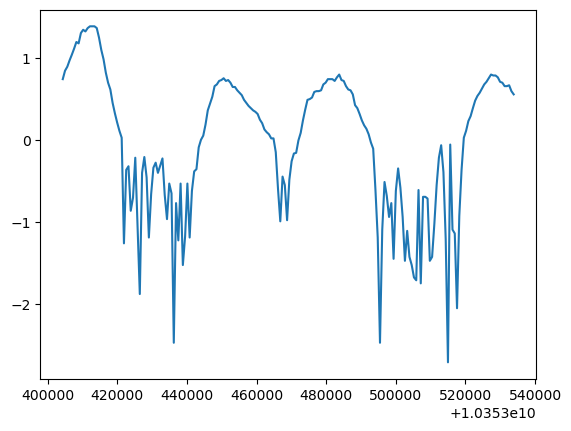

In [10]:
plt.plot(freq, z)

In [11]:
np.max(z), freq[np.argmax(z)]

(1.382994127100638, 10353412109.375)

Here are some example of the likelihood ratio distribution for different $x_0$.

In [12]:
# generate toy datasets from bkg and fit them
n_toy = 300
toy = stat.gen_toydataset(values=res_bkg.best_fit, n=n_toy, N=N)
res_toy_bkg = []
for i in range(n_toy):
    toy_w = prep.calc_weights(toy[i], N)
    res_toy_bkg.append(fits.fit_bkg(x=freq, y=toy[i], w=toy_w, center=center, ref=ref))   

For the maximum value of $\hat{\mu}$:

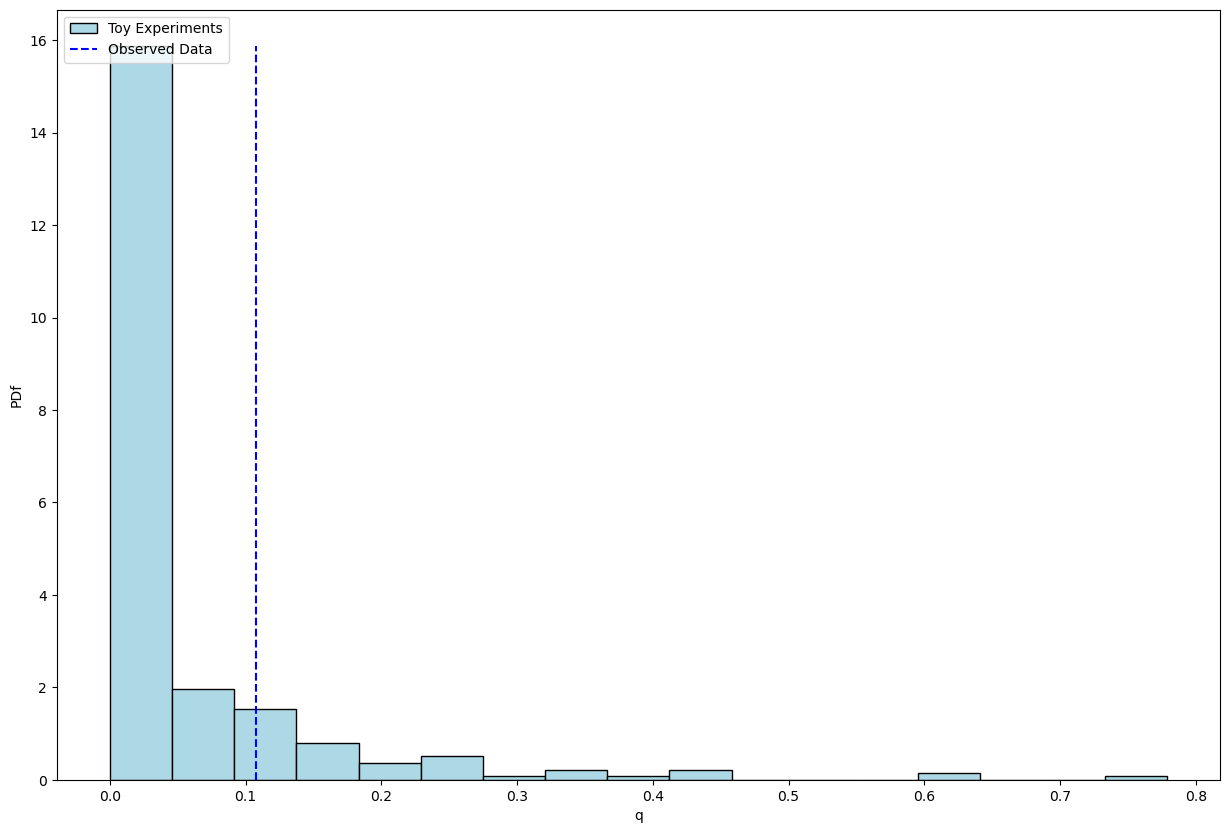

In [13]:
z_max = stat.significance(freq, fft, weights,
                          res_bkg, toy, res_toy_bkg,
                          x0_max, fits.signal_gauss, N, draw=True)

At the center of the cavity:

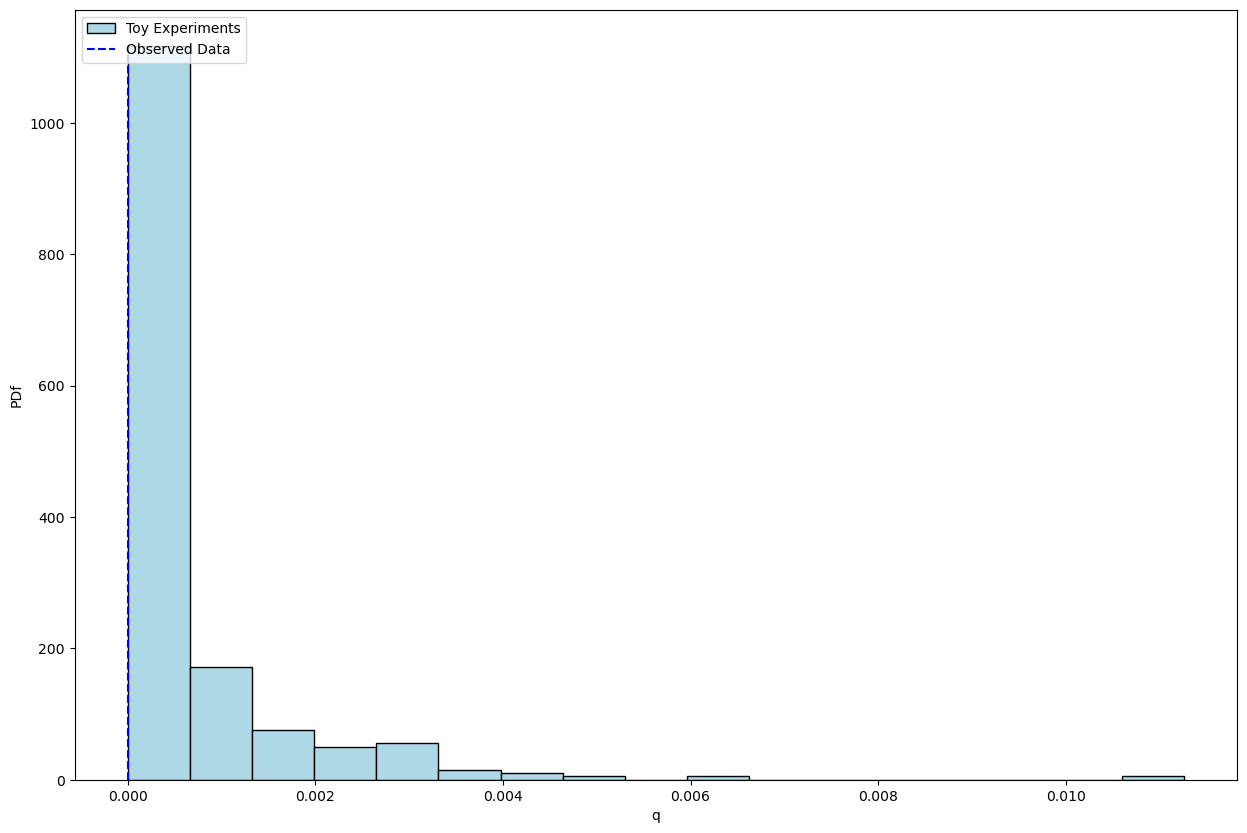

In [14]:
z_center = stat.significance(freq, fft, weights,
                             res_bkg, toy, res_toy_bkg,
                             center, fits.signal_gauss, N, draw=True)

In a secondary peak of $\hat{\mu}$:

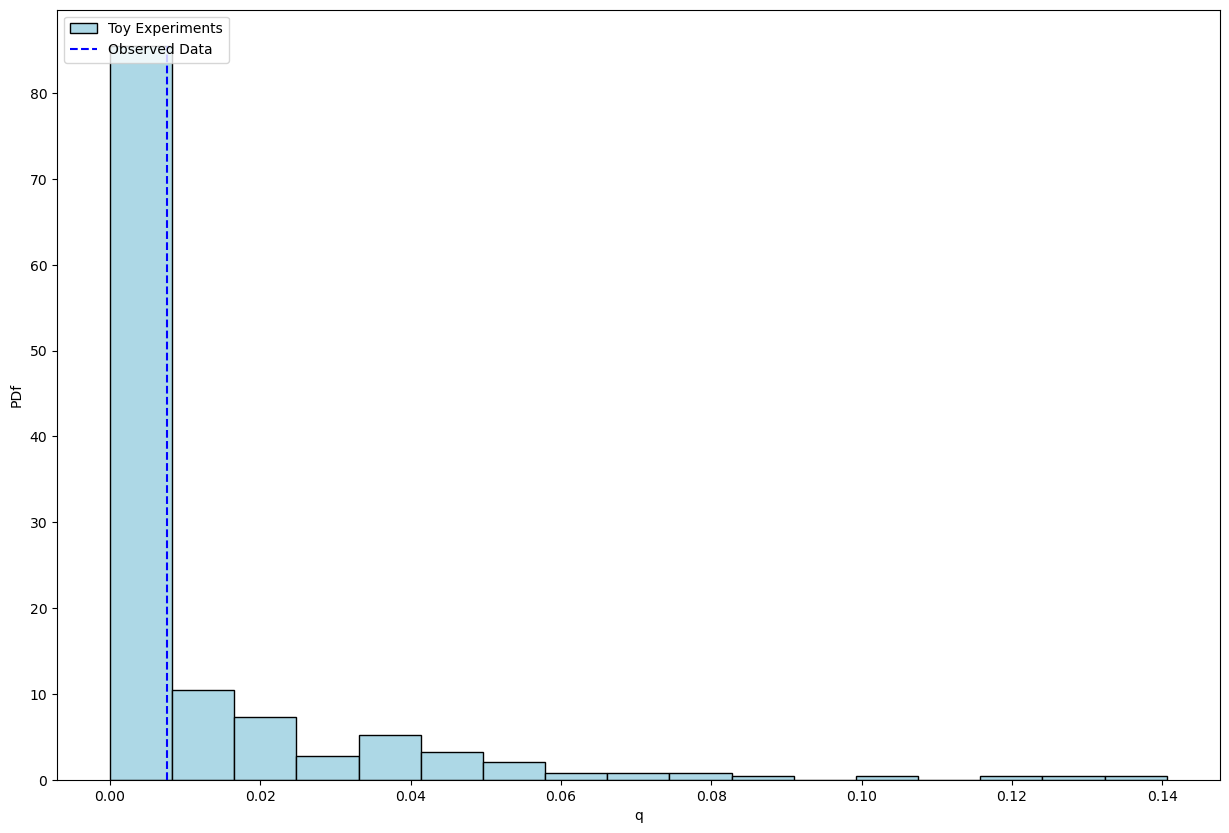

In [15]:
z = stat.significance(freq, fft, weights,
                      res_bkg, toy, res_toy_bkg,
                      freq[116], fits.signal_gauss, N, draw=True)